<a href="https://colab.research.google.com/github/raularaju/small_world_network/blob/main/IFC_redes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import numpy as np
import random
from collections import deque

In [2]:
def build_small_world_network(N, Z, p):
  G = nx.Graph()
  G.add_nodes_from(range(0, N))
  all_possible_edges = []
  for i in range(0, N):
    for j in range(i+1, N):
      all_possible_edges.append((i,j))
  for node in list(G.nodes()):
    for i in range(1 , ((math.floor(Z/2)) % N) + 1):
      G.add_edge(node, (node + i) % N)

  shortcut_num = math.floor( p * N * Z/2 )
  shortcut_edges = random.choices(all_possible_edges, k=shortcut_num)
  G.add_edges_from(shortcut_edges)
  return G

In [3]:
def plot_circular_graph(G):
  labels = {}
  for node in list(G.nodes()):
    labels[node] = node
  # Draw the graph with circular layout and labeled nodes
  pos = nx.circular_layout(G)
  nx.draw(G, pos, with_labels=True,labels= labels , node_size=500, node_color='lightblue', font_size=10)

  # Display the plot
  plt.show()


In [4]:
def FindPathLengthsFromNode(graph, node):
  d = 0
  distances = [math.inf for i in range(graph.number_of_nodes())]
  distances[node] = 0
  visited = [False for _ in range(graph.number_of_nodes())]
  visited[node] = True
  q = deque()
  q.append(node)
  while(q):
    n = q.popleft()
    for neighbor in list(graph.neighbors(n)):
      if(not visited[neighbor]):
        distances[neighbor] = distances[n] + 1
        q.append(neighbor)
        visited[neighbor] = True
  return distances


In [5]:
def FindAllPathLengths(graph):
  distances =[]
  for n in list(graph.nodes()):
    distances.append(FindPathLengthsFromNode(graph, n))
  distances = np.array(distances)
  return distances[np.triu_indices_from(distances)].tolist()

In [6]:
def plot_histogram(data):
  data = np.array(data)
  bin_edges = range(min(data) - 1, max(data) + 2)

  d = np.diff(np.unique(data)).min()
  left_of_first_bin = data.min() - float(d)/2
  right_of_last_bin = data.max() + float(d)/2
  plt.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d), edgecolor='black')
  plt.show()

In [7]:
def FindAveragePathLength(graph):
  return np.mean(FindAllPathLengths(graph))

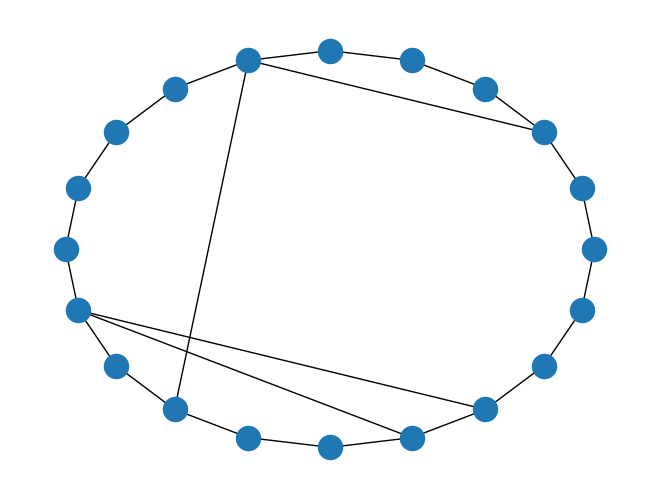

In [8]:
G = build_small_world_network(20, 2, 0.2)
nx.draw_circular(G)

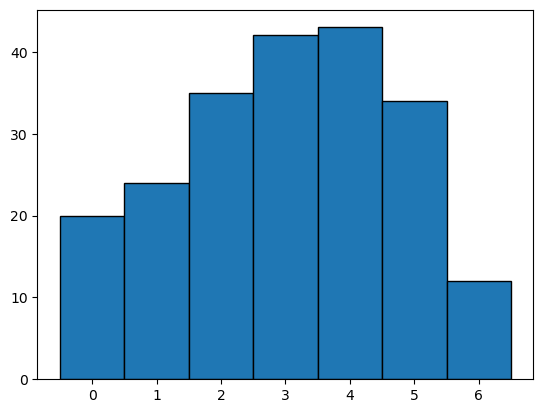

In [9]:
path_lengths = FindAllPathLengths(G)
plot_histogram(path_lengths)

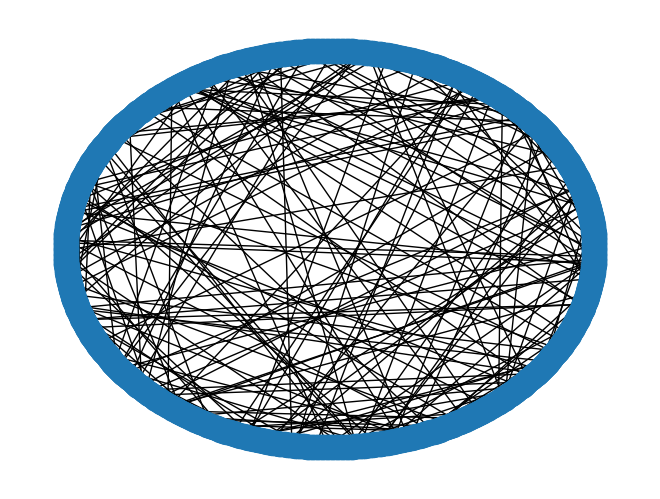

In [10]:
G = build_small_world_network(1000, 2, 0.2)
nx.draw_circular(G)

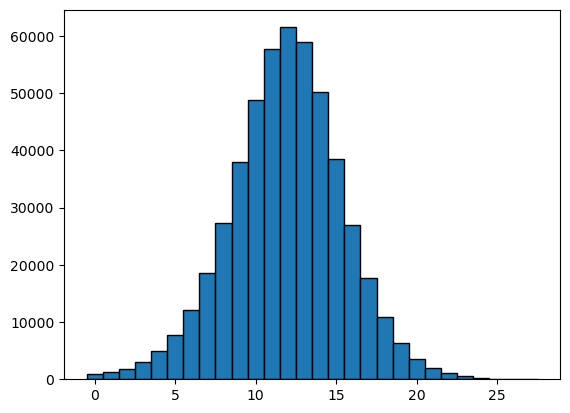

In [11]:
path_lengths = FindAllPathLengths(G)
plot_histogram(path_lengths)

Com o aumento de p, o histograma passa a ter menores valores máximos e valores menores no geral, como esperado.

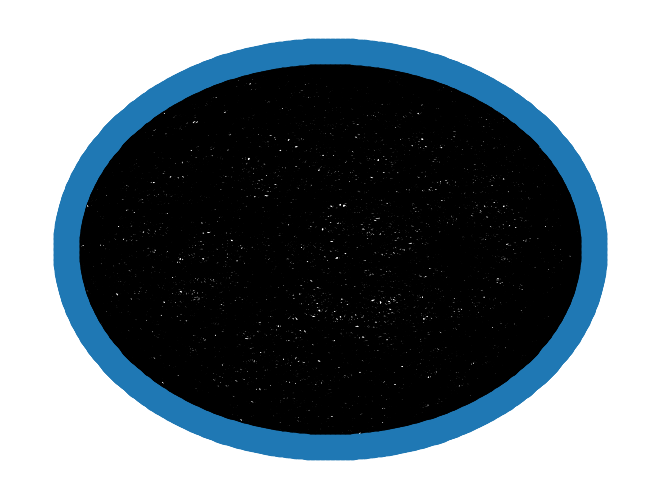

In [12]:
G = build_small_world_network(1000, 2, 2.25)
nx.draw_circular(G)

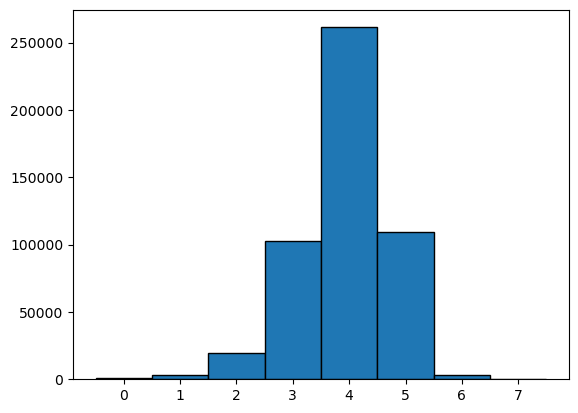

In [13]:
path_lengths = FindAllPathLengths(G)
plot_histogram(path_lengths)

O valor de p=2.25 parece ser suficiente para garantir que a máxima menor distância entre dois nó é 6.

In [14]:
n_iter = 100
sum_avg_length = 0
for _ in range(n_iter):
  G = build_small_world_network(100, 2, 0.1)
  avg_length = FindAveragePathLength(G)
  sum_avg_length += avg_length
print(sum_avg_length/n_iter)

9.620572277227724


Nessa rede, há aproximadamente (p * n(n-1)/2) - (n * Z/2) = 145 arestas longas

In [15]:
array_p = np.arange(10 ** -3 , 10 ** 3, 10 ** -2)
G0 = build_small_world_network(50, 2, 0)
avg_length_p0 = FindAveragePathLength(G0)
array_avg_length = []
for p in array_p:
  G = build_small_world_network(50, 2, p)
  avg_length = FindAveragePathLength(G)
  array_avg_length.append(avg_length/ avg_length_p0)


In [16]:
print(avg_length_p0)

12.254901960784315


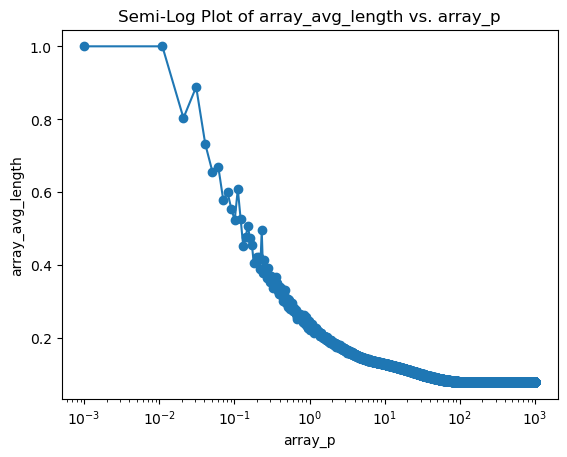

In [17]:
plt.semilogx(array_p, array_avg_length, marker='o', linestyle='-')

# Add labels and a title
plt.xlabel('array_p')
plt.ylabel('array_avg_length')
plt.title('Semi-Log Plot of array_avg_length vs. array_p')

# Show the plot
plt.show()

Para valores pequenos de p, os valores permanecem fixados em 1, pois não há muitas arestas longas, o que faz que o caminho mínimo entre dois vértices use muitas arestas curtas. Dessa forma, o tamanho do caminho médio se aproxima ao tamanho do caminho médio de um grafo que não tem nenhuma aresta longa.

Crie e exiba um gráfico circular de sua geometria da parte (c) (𝑍 = 2, 𝑁 = 50) em
𝑝 = 0,1; crie e exiba gráficos circulares da geometria de Watts e Strogatz (𝑍 = 10, 𝑁 =
1.000) em 𝑝 = 0,1 e 𝑝 = 0,001 (veja o comando nx.watts_strogatz(N,k,p) no
NetworkX). Qual dos sistemas deles parece estatisticamente mais semelhante ao seu?


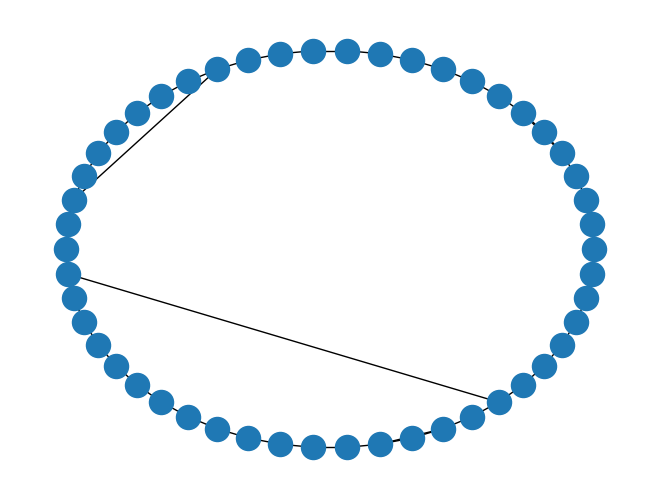

In [18]:
G = build_small_world_network(50, 2, 0.1)
nx.draw_circular(G)

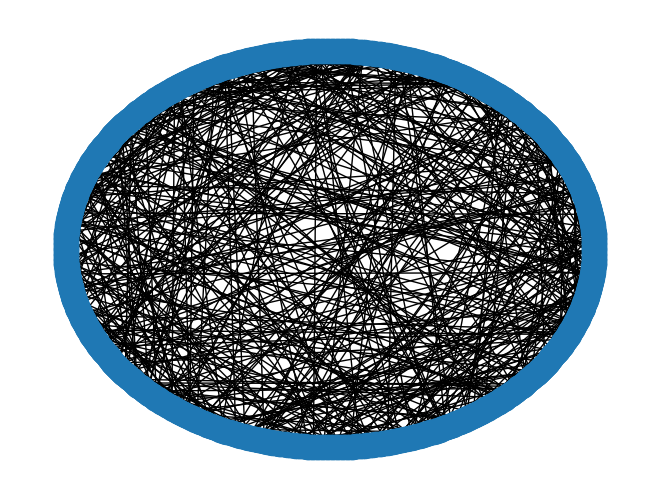

In [19]:
G = nx.watts_strogatz_graph(1000,10,0.1)
nx.draw_circular(G)

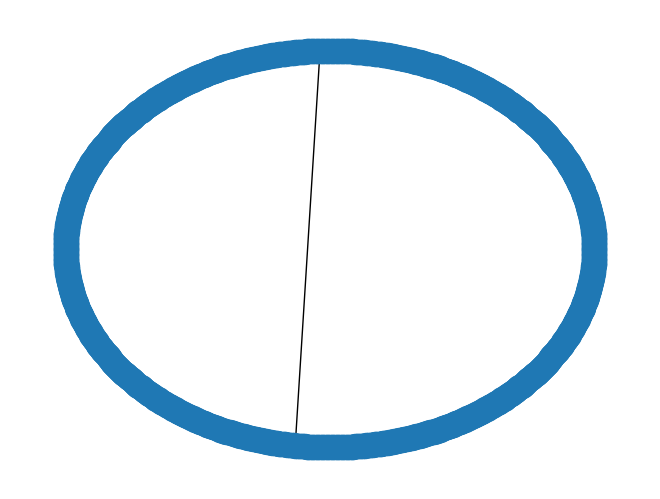

In [20]:
G = nx.watts_strogatz_graph(1000,10,0.001)
nx.draw_circular(G)

O grafo da geometria de Watts e Strogatzm para p = 0.001 é mais parecido com o meu, pois apesar de muito mais nós, ele possui poucas arestas de atalho.

Plote o comprimento médio do caminho redimensionado, 𝜋𝑍𝑑/𝑁, versus o número
total de atalhos, 𝑝𝑁𝑍/2, para um intervalo de 0,001 < 𝑝 < 1000, para 𝑁 = 100 e 200
e para 𝑍 = 2 e 4 .
Neste limite, o comprimento médio de ligação ⟨∆𝜃⟩ deve ser uma função apenas de 𝑀.
Como Watts e Strogatz [3] funcionaram em um valor de 𝑍𝑁 um fator de 100 maior que
o nosso, nossos valores de 𝑝 são um fator de 100 maior para obter o mesmo valor de
𝑀 = 𝑝𝑁𝑍/2. Newman e Watts [2] derivam esse limite contínuo com uma análise de
grupo de renormalização

In [21]:
def calculate_array_theta_d(N, Z, array_p):
  array_theta_d = []
  for p in array_p:
    G = build_small_world_network(N, Z, p)
    avg_length = FindAveragePathLength(G)
    array_theta_d.append(math.pi * Z * avg_length / N )
  return array_theta_d

In [22]:
def plot_array_theta_d(array_theta_d, array_p, N, Z):
  # Create a plot with array_p and array_avg_length_red
  plt.plot(array_p, array_theta_d, label='theta', marker='o', linestyle='-')

  # Add labels, a title, and a legend
  plt.xlabel('p')
  plt.ylabel('theta')
  plt.title(f'N = {N} e Z = {Z} ')
  plt.legend()

  # Show the plot
  plt.show()

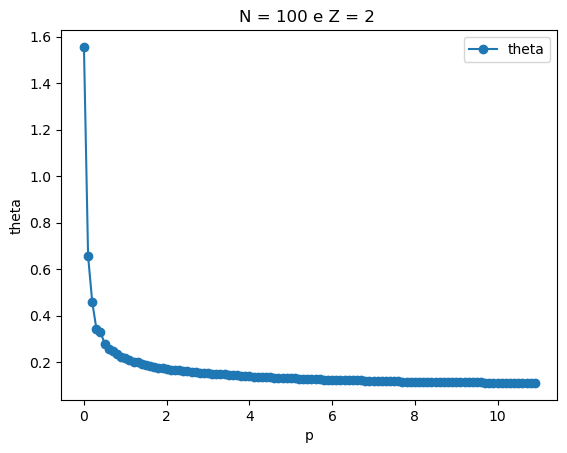

In [23]:
N = 100
Z = 2
array_p = np.arange(10 ** -3 , 1 + 10 ** 1, 10 ** -1)
array_theta_d =  calculate_array_theta_d(N, Z, array_p)
plot_array_theta_d(array_theta_d, array_p, N, Z)

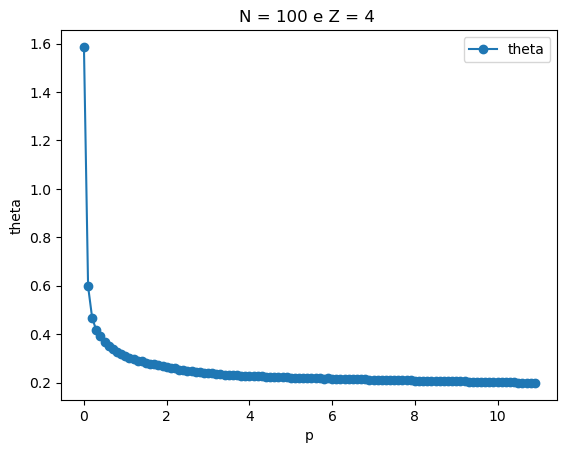

In [24]:
N = 100
Z = 4
array_p = np.arange(10 ** -3 , 1 + 10 ** 1, 10 ** -1)
array_theta_d =  calculate_array_theta_d(N, Z, array_p)
plot_array_theta_d(array_theta_d, array_p, N, Z)

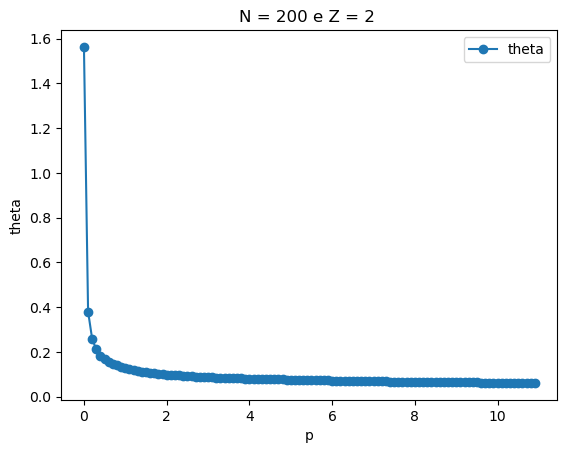

In [25]:
N = 200
Z = 2
array_p = np.arange(10 ** -3 , 1 + 10 ** 1, 10 ** -1)
array_theta_d =  calculate_array_theta_d(N, Z, array_p)
plot_array_theta_d(array_theta_d, array_p, N, Z)

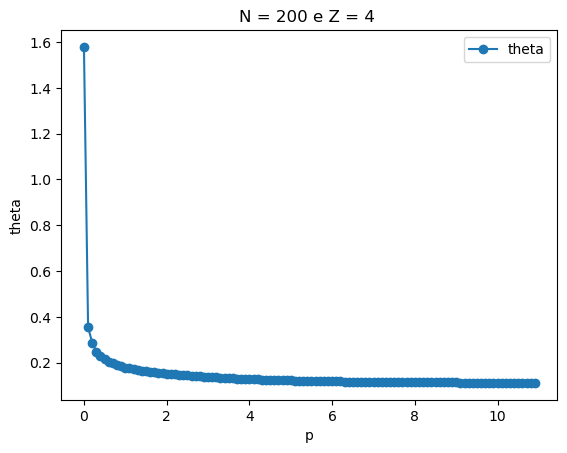

In [26]:
N = 200
Z = 4
array_p = np.arange(10 ** -3 , 1 + 10 ** 1, 10 ** -1)
array_theta_d =  calculate_array_theta_d(N, Z, array_p)
plot_array_theta_d(array_theta_d, array_p, N, Z)

Redes reais. Procure por uma rede real e encontre a distância média e o histograma
das distâncias entre os nós. (Veja, por exemplo,
https://networkrepository.com/network-data.php)

In [28]:
# Create an empty graph
G = nx.Graph()

# Specify the path to your file
file_path = "./data/karate_club.txt"  # Replace with the actual path to your file

# Read the file and add edges to the graph
with open(file_path, 'r') as file:
    for line in file:
        if not line.startswith('%'):
            # Skip lines starting with '%'
            u, v = map(int, line.split())
            G.add_edge(u -1 , v -1 )

# Print basic graph information
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

# You now have a NetworkX graph 'G' representing the data from the file.


Number of nodes: 34
Number of edges: 78


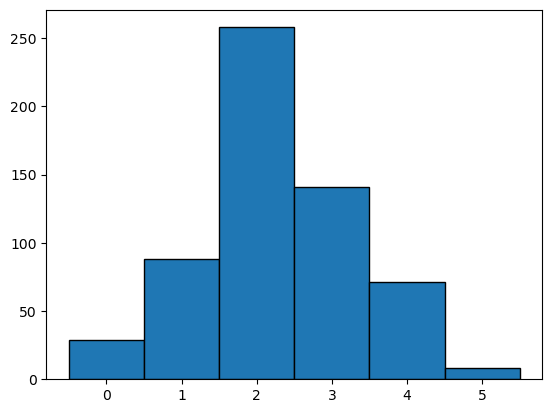

In [29]:
distances = FindAllPathLengths(G)
plot_histogram(distances)